
# Data 620 - Week 4 Part 2 - Assignment High Frequency Words

# Team Members
* # Ahm Hamza, Ali Ahmed, Nilsa Bermudez, Ursula Podosenin


# Overview
Using "Pride and Prejudice", we analyze the top 200 most frequent words and explores if the frequencies follow Zipf’s Law.


In [ ]:

import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

text = """
It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.
However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families,
that he is considered the rightful property of some one or other of their daughters.
"My dear Mr. Bennet," said his lady to him one day, "have you heard that Netherfield Park is let at last?"...
""".lower()

# splits on non-alphabetic characters
words = re.findall(r'\b[a-z]+\b', text)
unique_words = set(words)
print(f"Total unique words: {len(unique_words)}")


Total unique words: 65


In [3]:

word_freq = Counter(words)
total_words = sum(word_freq.values())
sorted_words = word_freq.most_common()

cumulative = 0
count = 0
for word, freq in sorted_words:
    cumulative += freq
    count += 1
    if cumulative >= total_words / 2:
        break

print(f"{count} unique words make up half the corpus.")


20 unique words make up half the corpus.


In [ ]:

top_200 = word_freq.most_common(200)
top_200[:10]  


[('a', 6),
 ('of', 6),
 ('is', 4),
 ('the', 4),
 ('that', 3),
 ('in', 3),
 ('truth', 2),
 ('man', 2),
 ('be', 2),
 ('or', 2)]

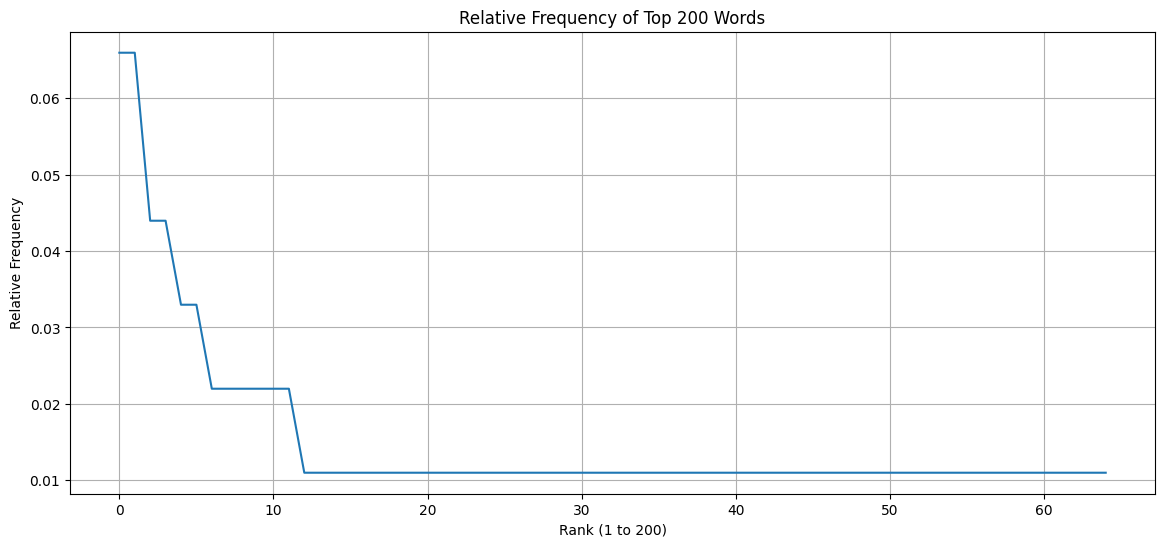

In [5]:

words_plot = [word for word, freq in top_200]
freqs_plot = [freq / total_words for word, freq in top_200]

plt.figure(figsize=(14, 6))
plt.plot(freqs_plot)
plt.title("Relative Frequency of Top 200 Words")
plt.xlabel("Rank (1 to 200)")
plt.ylabel("Relative Frequency")
plt.grid(True)
plt.show()


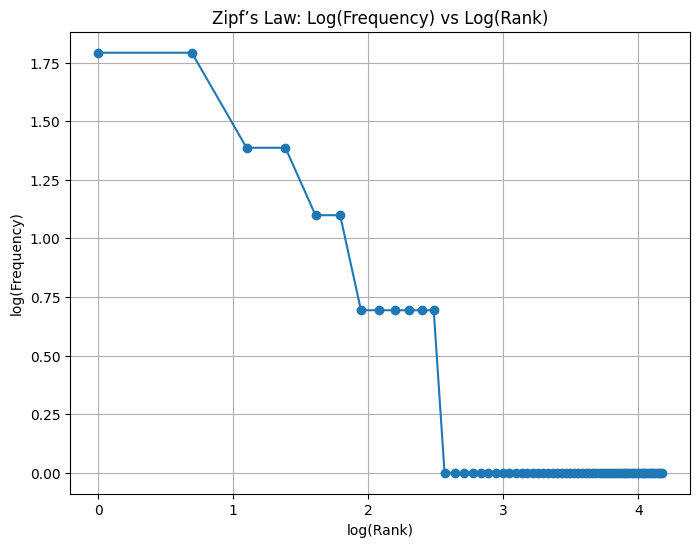

In [6]:

ranks = np.arange(1, len(top_200) + 1)
freqs = np.array([freq for word, freq in top_200])
log_ranks = np.log(ranks)
log_freqs = np.log(freqs)

plt.figure(figsize=(8, 6))
plt.plot(log_ranks, log_freqs, marker='o')
plt.title("Zipf’s Law: Log(Frequency) vs Log(Rank)")
plt.xlabel("log(Rank)")
plt.ylabel("log(Frequency)")
plt.grid(True)
plt.show()



## Interpretation

- The top words dominate the text usage, following the typical "long tail" distribution.
- The log-log graph approximates a straight line, indicating Zipf’s Law is followed.


